# Raw Document Analysis

## Data Loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chinm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\chinm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
FILE_PATH = 'data/v0_LK_tea_dataset.csv'

data = pd.read_csv(FILE_PATH) 
data.shape, data.columns

((167, 23),
 Index(['id', 'original_class', 'class', 'filename', 'path', 'url',
        'language_label', 'required_ocr', 'has_tables', 'text_path', 'quality',
        'data_origin', 'retrieved_date_of_issuance', 'issuing_authority',
        'retrieved_topic', 'text_content', 'PDF_or_text', 'markdown_content',
        'llama_title', 'llama_issue_date', 'llama_reference_number', 'is_empty',
        'markdown_path'],
       dtype='object'))

In [4]:
data.head()

,id,original_class,class,filename,path,url,language_label,required_ocr,has_tables,text_path,...,issuing_authority,retrieved_topic,text_content,PDF_or_text,markdown_content,llama_title,llama_issue_date,llama_reference_number,is_empty,markdown_path
0,0,ACT,regulatory,ACT_1.txt,NaN,https://www.lawnet.gov.lk/tea-subsidy-3/,en,no,no,/content/drive/MyDrive/Omdena_Challenge/new_LK...,...,Parliament of Sri Lanka,Tea Subsidy – LawNet,"Tea Subsidy\r\nActs Nos. 12 of 1958, 66 of 196...",Text,"# Tea Subsidy\r\n\r\nActs Nos. 12 of 1958, 66 ...","Tea Subsidy Act, No. 12 of 1958","19th September, 1958","12 of 1958, 66 of 1961, 33 of 1966",False,/content/drive/MyDrive/Omdena_Challenge/new_LK...
1,1,ACT,regulatory,ACT_2.txt,NaN,https://www.lawnet.gov.lk/tea-small-holdings-d...,en,no,no,/content/drive/MyDrive/Omdena_Challenge/new_LK...,...,Parliament of Sri Lanka,Tea Small Holdings Development (Amendment) – L...,|\r\n\r\n**Tea Small Holdings Development (Ame...,Text,# Tea Small Holdings Development (Amendment)\r...,Tea Small Holdings Development (Amendment),"12th August, 1997",No. 21 of 1997,False,/content/drive/MyDrive/Omdena_Challenge/new_LK...
2,2,ACT,regulatory,ACT_3.txt,NaN,https://www.lawnet.gov.lk/tea-small-holdings-d...,en,no,no,/content/drive/MyDrive/Omdena_Challenge/new_LK...,...,Parliament of Sri Lanka,Tea Small Holdings Development (Amendment) – L...,|\r\n\r\n**Tea Small Holdings Development (Ame...,Text,# Tea Small Holdings Development (Amendment)\r...,Tea Small Holdings Development (Amendment),"22nd October, 2003",Act No. 34 of 2003,False,/content/drive/MyDrive/Omdena_Challenge/new_LK...
3,3,ACT,regulatory,ACT_4.txt,NaN,https://www.lawnet.gov.lk/tea-small-holdings-d...,en,no,no,/content/drive/MyDrive/Omdena_Challenge/new_LK...,...,Parliament of Sri Lanka,Tea Small Holdings Development Law – LawNet,Tea Small Holdings Development Law\r\nA LAW TO...,Text,# Tea Small Holdings Development Law\r\n\r\nA ...,Tea Small Holdings Development Law,1975,35,False,/content/drive/MyDrive/Omdena_Challenge/new_LK...
4,4,ACT,regulatory,ACT_5.txt,NaN,https://www.lawnet.gov.lk/tea-research-board-a...,en,no,no,/content/drive/MyDrive/Omdena_Challenge/new_LK...,...,Parliament of Sri Lanka,Tea Research Board (Amendment) – LawNet,|\r\n\r\n**Tea Research Board (Amendment)** |\...,Text,# Tea Research Board (Amendment)\r\n\r\n# AN A...,"AN ACT TO AMEND THE TEA RESEARCH BOARD ACT, NO...","6th November, 2006",43 of 2006,False,/content/drive/MyDrive/Omdena_Challenge/new_LK...


## Tokens Statistical Analysis + Visualization

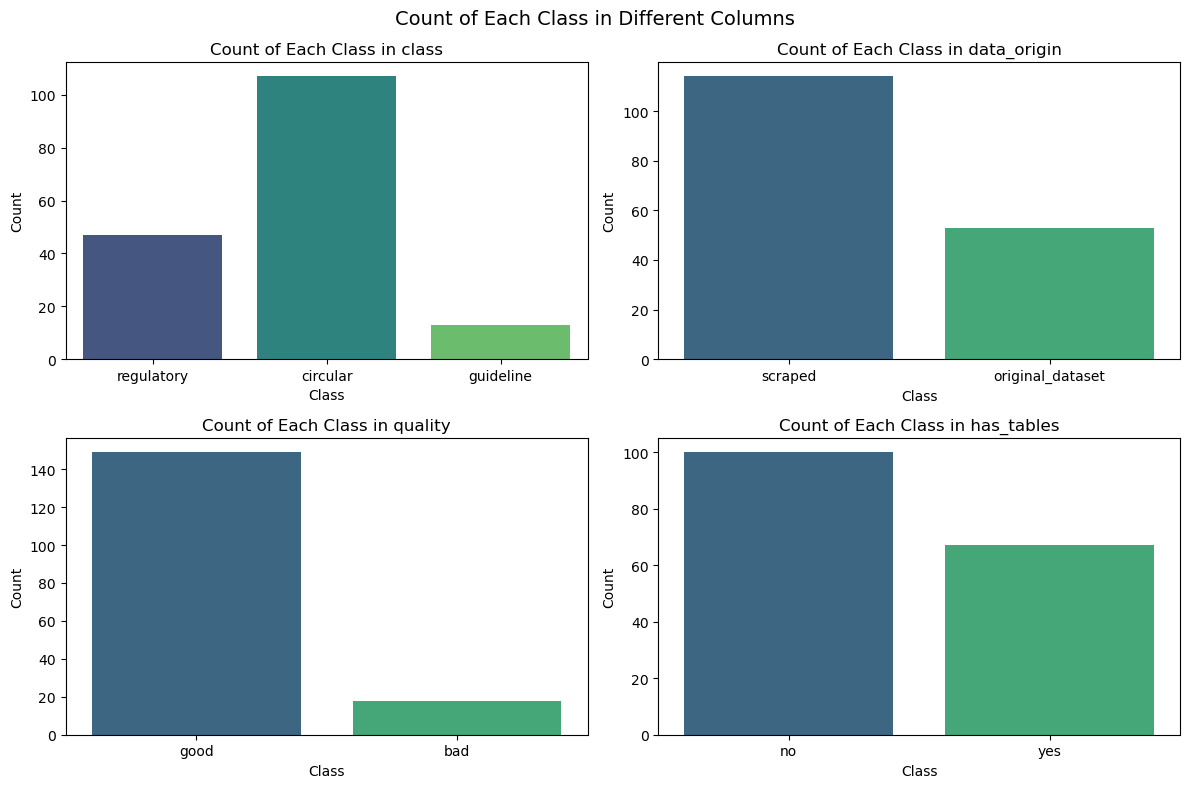

In [5]:
# Set up the matplotlib figure
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# List of columns and corresponding axes
columns = ['class', 'data_origin', 'quality', 'has_tables']
for ax, col in zip(axes.flatten(), columns):
    sns.countplot(data=data, x=col, palette='viridis', ax=ax)
    ax.set_title(f'Count of Each Class in {col}')
    ax.set_xlabel('Class')
    ax.set_ylabel('Count')

# Adjust layout
plt.suptitle("Count of Each Class in Different Columns", fontsize=14)
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig("plots/EDA_document_counts_per_class.png", format='png', dpi=300)
plt.show()

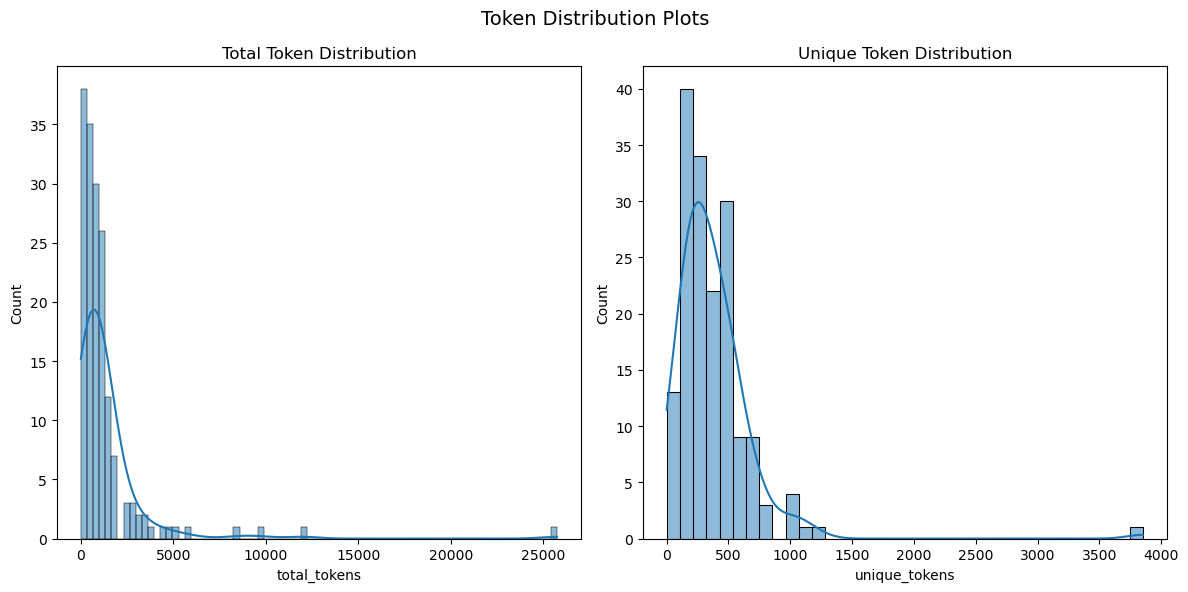

In [6]:
# code for plotting how the token distribution for each row text in 'text_content' column
# steps: tokenize the text_content column; create two columns for total and unique token counts; make 2 distribution plots

import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter

# Tokenize the text_content column, handling non-string values
data['tokens'] = data['text_content'].apply(lambda x: word_tokenize(x) if isinstance(x, str) else [])

# Create two columns for total and unique token counts  
data['total_tokens'] = data['tokens'].apply(len)
data['unique_tokens'] = data['tokens'].apply(lambda x: len(set(x)))

# Make 2 distribution plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(data=data, x='total_tokens', kde=True, ax=axes[0])
axes[0].set_title("Total Token Distribution")
sns.histplot(data=data, x='unique_tokens', kde=True, ax=axes[1])
axes[1].set_title("Unique Token Distribution")

plt.suptitle("Token Distribution Plots", fontsize=14)
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig("plots/EDA_token_distribution.png", format='png', dpi=300)
plt.show()

In [7]:
data['total_tokens'].describe()

count      167.000000
mean      1297.071856
std       2458.351124
min          0.000000
25%        342.000000
50%        758.000000
75%       1262.000000
max      25736.000000
Name: total_tokens, dtype: float64

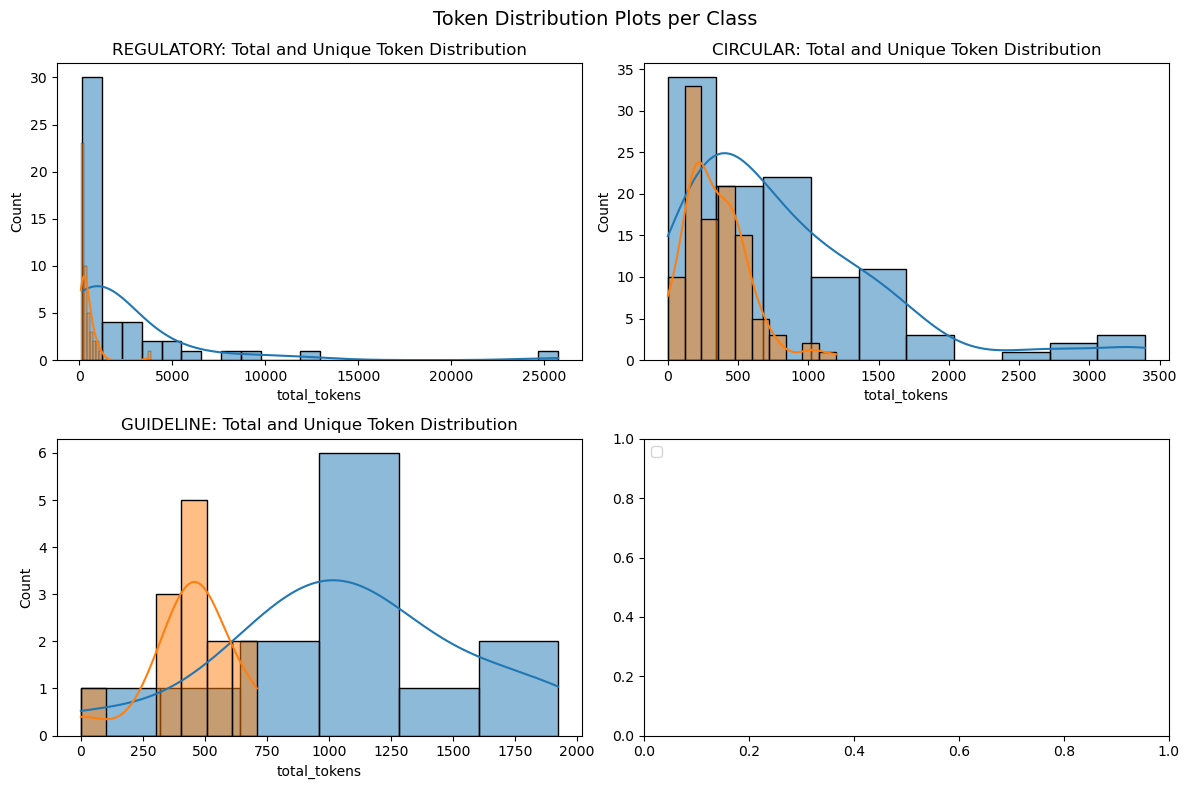

In [8]:
data['tokens'] = data['text_content'].apply(lambda x: word_tokenize(x) if isinstance(x, str) else [])

# Create two columns for total and unique token counts  
data['total_tokens'] = data['tokens'].apply(len)
data['unique_tokens'] = data['tokens'].apply(lambda x: len(set(x)))

all_classes = data['class'].unique()
all_classes_count = len(all_classes) # 3

# Make 4 distribution plots in 2 columns for total 8 plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for i, ax in enumerate(axes.flatten()):
    if i < all_classes_count:
        sns.histplot(data=data[data['class'] == all_classes[i]], x='total_tokens', kde=True, ax=ax)
        sns.histplot(data=data[data['class'] == all_classes[i]], x='unique_tokens', kde=True, ax=ax)
        ax.set_title(f"{all_classes[i].upper()}: Total and Unique Token Distribution")

# Adjust layout
plt.suptitle("Token Distribution Plots per Class", fontsize=14)
plt.tight_layout()
plt.legend(['total_tokens', 'unique_tokens'], loc='upper left')

# Save the plot as a PNG file
plt.savefig("plots/EDA_token_distribution_per_class.png", format='png', dpi=300)
plt.show()

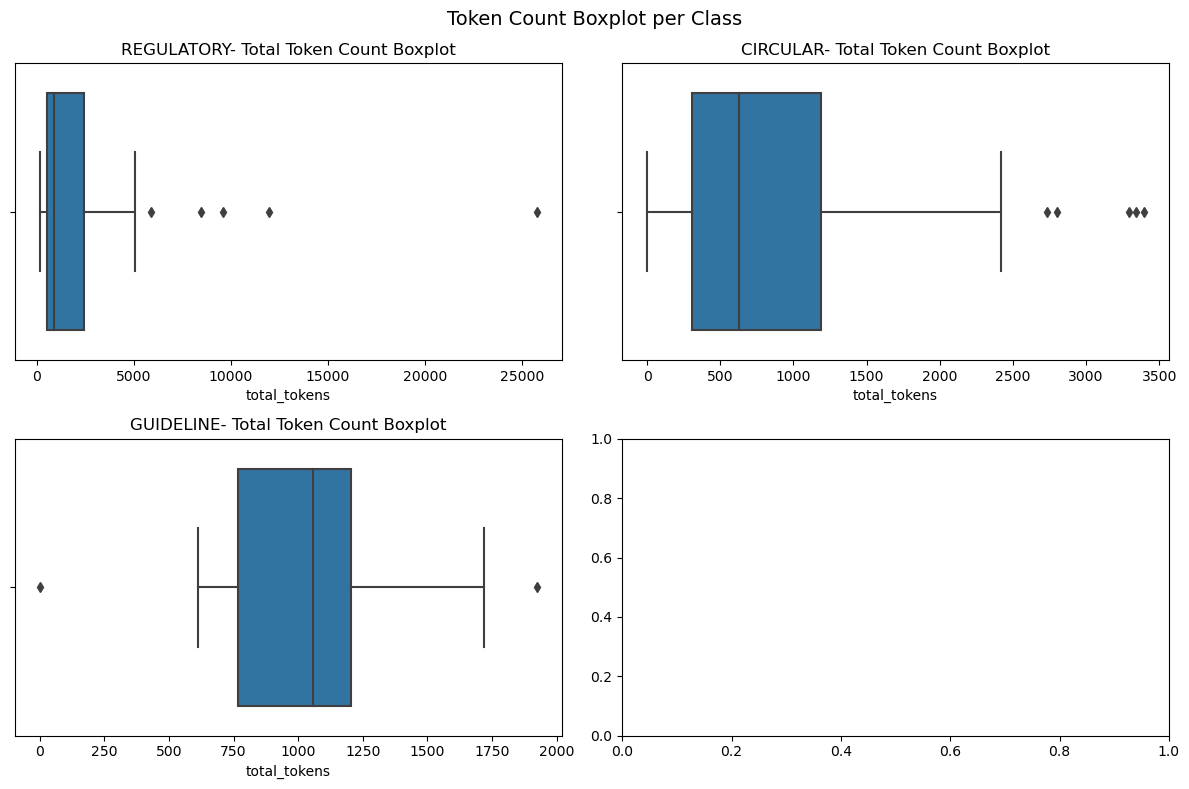

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for i, ax in enumerate(axes.flatten()):
    if i < all_classes_count:
        sns.boxplot(data=data[data['class'] == all_classes[i]], x='total_tokens', ax=ax)
        ax.set_title(f"{all_classes[i].upper()}- Total Token Count Boxplot")

# Adjust layout
plt.suptitle("Token Count Boxplot per Class", fontsize=14)
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig("plots/EDA_token_boxplot_per_class.png", format='png', dpi=300)
plt.show()

## Worldclouds

In [10]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


### Knowledgebase Wordcloud

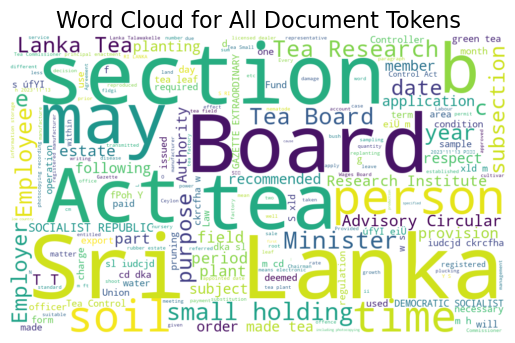

In [11]:
# wordcloud for total_content from alredy present 'tokens' column 
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize 
from collections import Counter 
from wordcloud import WordCloud

# Combine all tokens into a single string
all_tokens_list = [token for tokens_list in data['tokens'] for token in tokens_list]
all_tokens = ' '.join(all_tokens_list)

# Create a WordCloud object
wordcloud = WordCloud(width=1000, height=600, background_color='white', colormap='viridis').generate(all_tokens)

# Display the WordCloud
plt.title("Word Cloud for All Document Tokens", fontsize=16)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Save the plot as a PNG file
plt.savefig("plots/EDA_all_tokens_wordcloud.png", format='png', dpi=300)
plt.show()

In [12]:
print(f"Total Token Count: {len(all_tokens_list)}")
print(f"Total Unique Token Count: {len(set(all_tokens_list))}")

Total Token Count: 216611
Total Unique Token Count: 18794


### Document class wordcloud

In [13]:
all_classes = data['class'].unique()
all_classes

array(['regulatory', 'circular', 'guideline'], dtype=object)

#### Regulatory Wordcloud

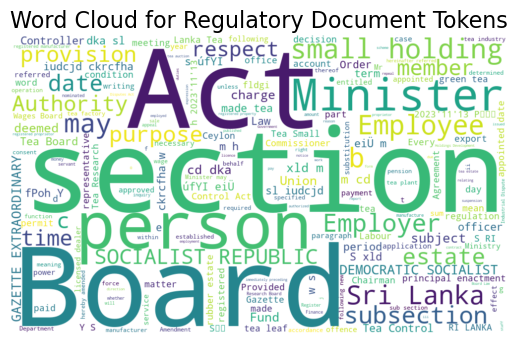

In [14]:
# wordcloud for total_content from 'tokens' column for all documents of 'regulatory' class
all_regulatory_tokens_list = [token for tokens_list in data[data['class'] == all_classes[0]]['tokens'] for token in tokens_list]

# Combine all tokens into a single string
all_regulatory_tokens = ' '.join(all_regulatory_tokens_list)

# Create a WordCloud object
wordcloud = WordCloud(width=1000, height=600, background_color='white', colormap='viridis').generate(all_regulatory_tokens)

# Display the WordCloud
plt.title("Word Cloud for Regulatory Document Tokens", fontsize=16)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Save the plot as a PNG file
plt.savefig("plots/EDA_regulatory_tokens_wordcloud.png", format='png', dpi=300)
plt.show()

In [15]:
class_name = data['class'].unique()[0]
print(f"Total {class_name} Token Count: {len(all_regulatory_tokens_list)}")
print(f"Total Unique {class_name} Token Count: {len(set(all_regulatory_tokens_list))}")

Total regulatory Token Count: 115493
Total Unique regulatory Token Count: 7063


#### Circular Wordcloud

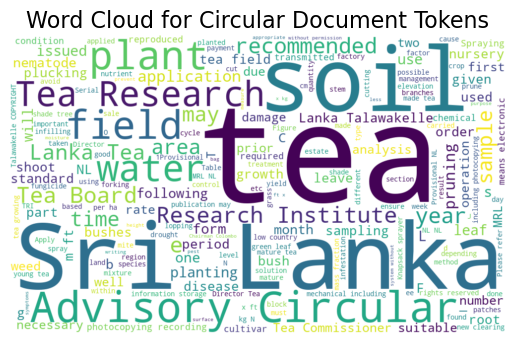

In [16]:
# wordcloud for total_content from 'tokens' column for all documents of 'circular' class
all_circular_tokens_list = [token for tokens_list in data[data['class'] == all_classes[1]]['tokens'] for token in tokens_list]

# Combine all tokens into a single string
all_circular_tokens = ' '.join(all_circular_tokens_list)

# Create a WordCloud object
wordcloud = WordCloud(width=1000, height=600, background_color='white', colormap='viridis').generate(all_circular_tokens)

# Display the WordCloud
plt.title("Word Cloud for Circular Document Tokens", fontsize=16)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Save the plot as a PNG file
plt.savefig("plots/EDA_circular_tokens_wordcloud.png", format='png', dpi=300)
plt.show()

In [17]:
class_name = data['class'].unique()[1]
print(f"Total {class_name} Token Count: {len(all_circular_tokens)}")
print(f"Total Unique {class_name} Token Count: {len(set(all_circular_tokens_list))}")

Total circular Token Count: 479080
Total Unique circular Token Count: 12823


#### Guideline Wordcloud

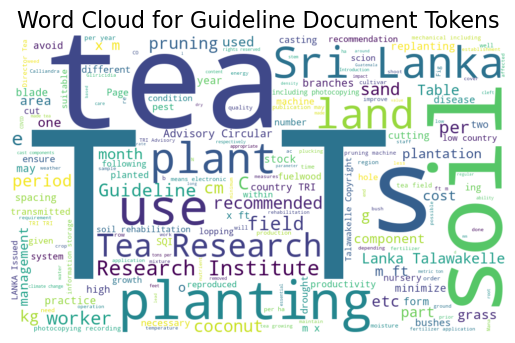

In [18]:
# wordcloud for total_content from 'tokens' column for all documents of 'guideline' class
all_guideline_tokens_list = [token for tokens_list in data[data['class'] == all_classes[2]]['tokens'] for token in tokens_list]

# Combine all tokens into a single string
all_guideline_tokens = ' '.join(all_guideline_tokens_list)

# Create a WordCloud object
wordcloud = WordCloud(width=1000, height=600, background_color='white', colormap='viridis').generate(all_guideline_tokens)

# Display the WordCloud
plt.title("Word Cloud for Guideline Document Tokens", fontsize=16)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Save the plot as a PNG file
plt.savefig("plots/EDA_guideline_tokens_wordcloud.png", format='png', dpi=300)
plt.show()

In [19]:
class_name = data['class'].unique()[2]
print(f"Total {class_name} Token Count: {len(all_guideline_tokens)}")
print(f"Total Unique {class_name} Token Count: {len(set(all_guideline_tokens_list))}")

Total guideline Token Count: 73860
Total Unique guideline Token Count: 3042


## Tokens and Page Counts

#### Total Token Count Comparison per Document Class

In [20]:
doc_stats_df = pd.DataFrame({
    'class': data['class'].unique(),
    'total_document_count': [len(data[data['class'] == class_name]) for class_name in data['class'].unique()],
    'total_tokens_count': [len(all_regulatory_tokens_list), len(all_circular_tokens_list), len(all_guideline_tokens_list)],
    'total_unique_tokens_count': [len(set(all_regulatory_tokens_list)), len(set(all_circular_tokens_list)), len(set(all_guideline_tokens_list))]
})

doc_stats_df

,class,total_document_count,total_tokens_count,total_unique_tokens_count
0,regulatory,47,115493,7063
1,circular,107,87286,12823
2,guideline,13,13832,3042


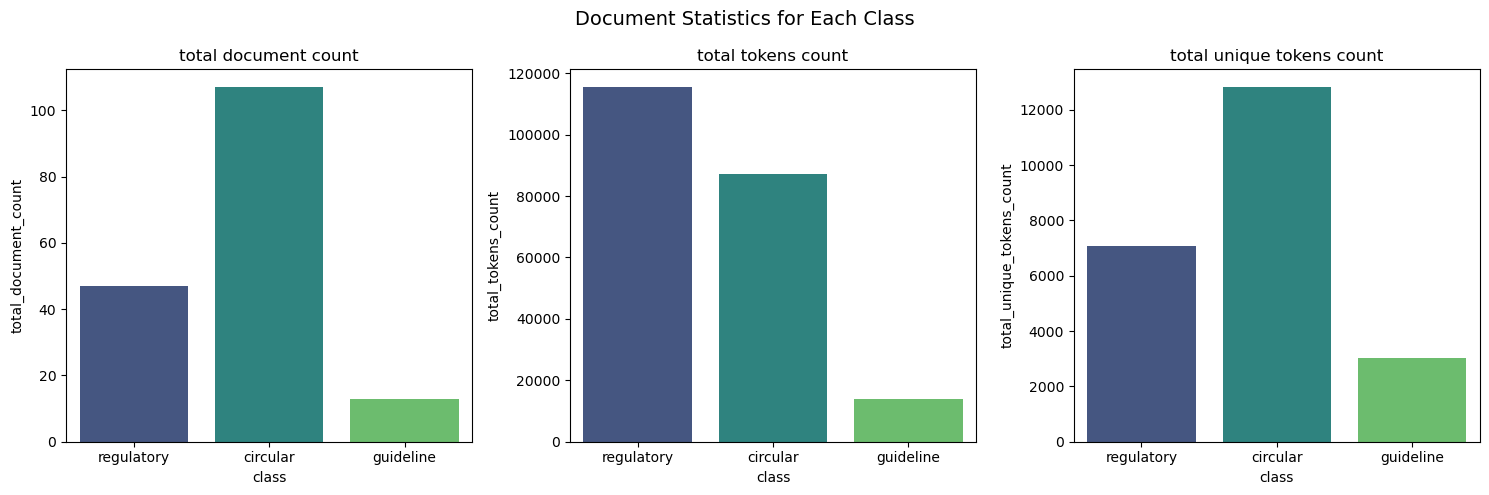

In [21]:
# for each class, plot for total_document_count, total_tokens_count, total_unique_tokens_count 
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(doc_stats_df.columns[1:]):
    sns.barplot(x='class', y=col, data=doc_stats_df, ax=axes[i], palette='viridis')
    axes[i].set_title(f"{col.replace('_', ' ')}")

# Adjust layout
plt.suptitle("Document Statistics for Each Class", fontsize=14)
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig("plots/EDA_all_document_stats.png", format='png', dpi=300)
plt.show()

#### Proxy Pages per Document

Check out the [OpenAI Blog](https://help.openai.com/en/articles/4936856-what-are-tokens-and-how-to-count-them) on "What are tokens and how to count them?"

Total Page Count: 457


Text(0.5, 1.0, 'Estimated Page Count Distribution')

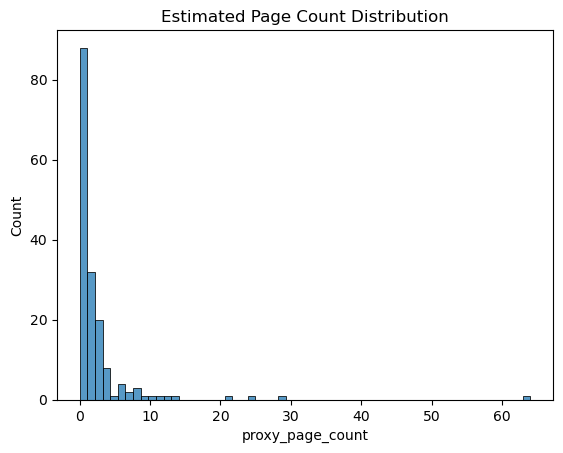

In [22]:
# 1 page ~= 3-4 paragraphs ~= 400 tokens
data['proxy_page_count'] = data['total_tokens'].apply(lambda x: x // 400)
print(f"Total Page Count: {data['proxy_page_count'].sum()}")
sns.histplot(data['proxy_page_count'])
plt.title("Estimated Page Count Distribution")

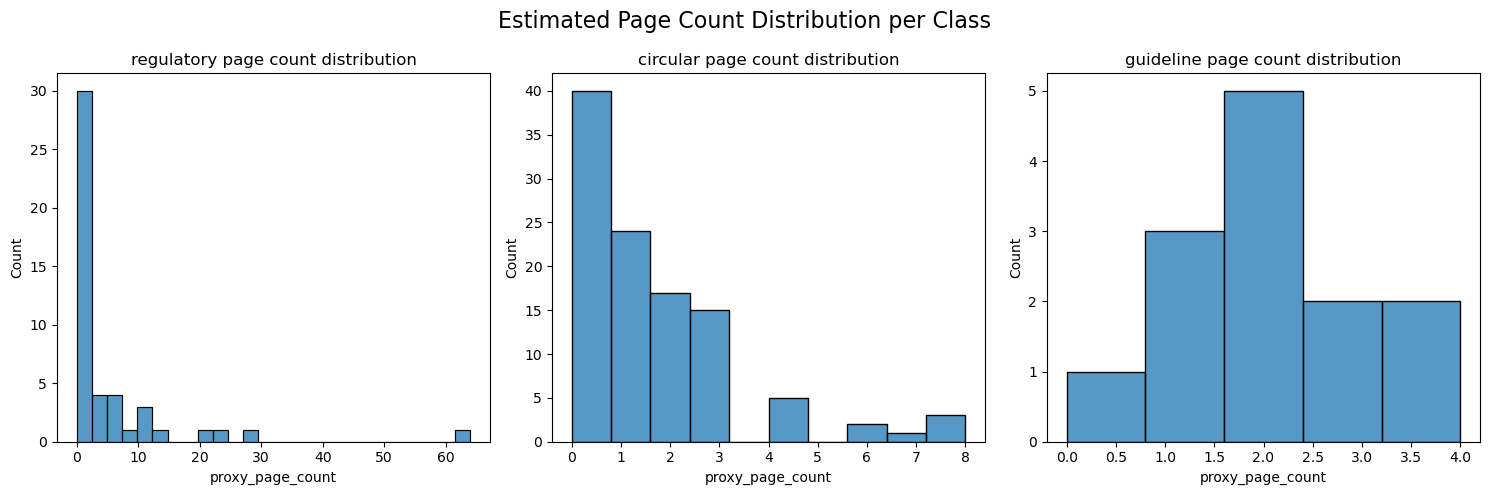

In [23]:
# for each data['class'] make a histogram for proxy_page_count
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, class_name in enumerate(data['class'].unique()):
    sns.histplot(data=data[data['class'] == class_name]['proxy_page_count'], ax=axes[i])
    axes[i].set_title(f"{class_name} page count distribution")

# Adjust layout
plt.suptitle("Estimated Page Count Distribution per Class", fontsize=16)
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig("plots/EDA_page_count_distribution_per_class.png", format='png', dpi=300)
plt.show()

# Semantic Chunk EDA

[TODO]
- total chunks count
- total chunk count per doc 
- (viz) total chunk count per doc dist

In [24]:
chunks_df = pd.read_csv('data/semantic_chunks.csv')
chunks_df.shape, chunks_df.columns

((1658, 2), Index(['id', 'semantic_chunk_text'], dtype='object'))

In [25]:
chunks_df['semantic_chunk_tokens'] = chunks_df['semantic_chunk_text'].apply(lambda x: word_tokenize(x) if isinstance(x, str) else [])
chunks_df['semantic_chunk_total_token_count'] = chunks_df['semantic_chunk_tokens'].apply(len)
chunks_df['semantic_chunk_unique_tokens'] = chunks_df['semantic_chunk_tokens'].apply(lambda x: set(x))
chunks_df['semantic_chunk_total_unique_token_count'] = chunks_df['semantic_chunk_unique_tokens'].apply(len)

count    167.000000
mean       9.928144
std       11.381431
min        2.000000
25%        5.000000
50%        7.000000
75%       11.000000
max      111.000000
Name: semantic_chunk_text, dtype: float64


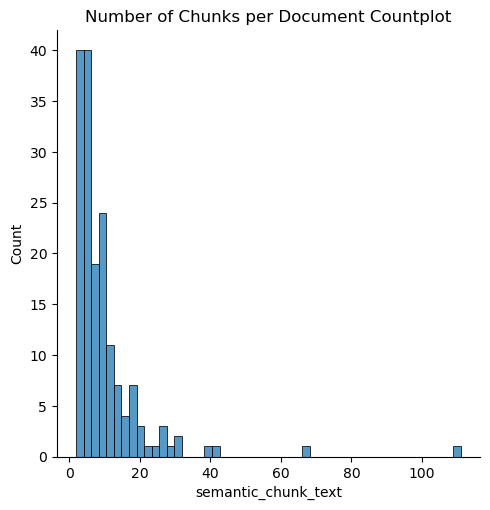

In [26]:
chunks_per_doc = chunks_df.groupby('id')['semantic_chunk_text'].agg(len)
print(chunks_per_doc.describe())

sns.displot(chunks_per_doc)
plt.title("Number of Chunks per Document Countplot")

# Save the plot as a PNG file
plt.savefig("plots/EDA_chunks_per_doc_countplot.png", format='png', dpi=300)
plt.show()

count    167.000000
mean     112.733327
std       55.580547
min       31.000000
25%       75.206044
50%      101.500000
75%      135.488095
max      427.428571
Name: semantic_chunk_total_token_count, dtype: float64


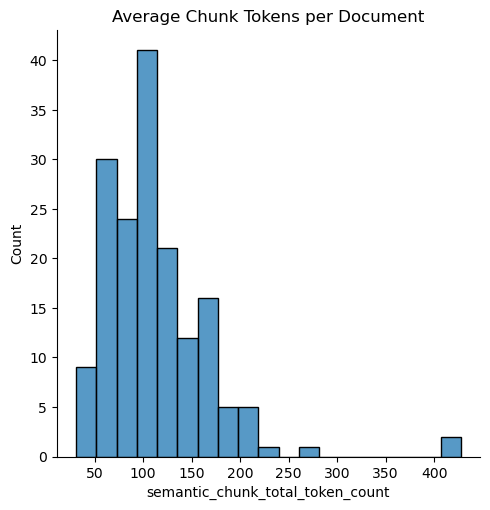

In [27]:
avg_chunk_tokens_per_doc = chunks_df.groupby('id')['semantic_chunk_total_token_count'].agg(pd.Series.mean)
print(avg_chunk_tokens_per_doc.describe())

sns.displot(avg_chunk_tokens_per_doc)
plt.title("Average Chunk Tokens per Document")

# Save the plot as a PNG file
plt.savefig("plots/EDA_avg_chunk_tokens_per_doc.png", format='png', dpi=300)
plt.show()

count     167.000000
mean      361.640719
std       300.633292
min        77.000000
25%       186.500000
50%       289.000000
75%       413.500000
max      2110.000000
Name: semantic_chunk_total_token_count, dtype: float64


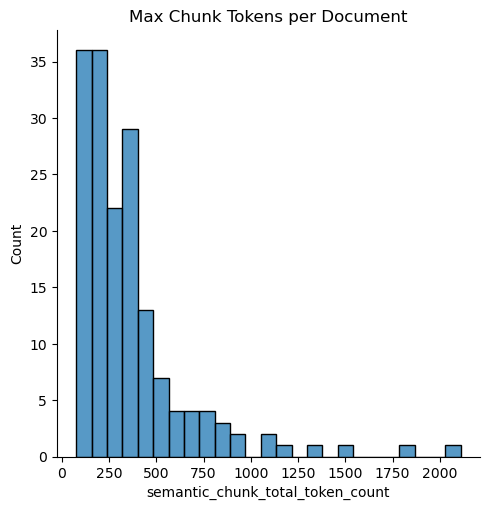

In [28]:
max_chunk_tokens_per_doc = chunks_df.groupby('id')['semantic_chunk_total_token_count'].agg(pd.Series.max)
print(max_chunk_tokens_per_doc.describe())

sns.displot(max_chunk_tokens_per_doc)
plt.title("Max Chunk Tokens per Document")

# Save the plot as a PNG file
plt.savefig("plots/EDA_max_chunk_tokens_per_doc.png", format='png', dpi=300)
plt.show()